In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("training_results_so_far.csv")
df.head()

,epoch,train_loss,val_loss,best_val_loss,lr
0,1,4.116434,3.226403,3.226403,0.0003
1,2,3.108729,2.852003,2.852003,0.0003
2,3,2.829638,2.693442,2.693442,0.0003
3,4,2.669632,2.596952,2.596952,0.0003
4,5,2.561002,2.532089,2.532089,0.0003


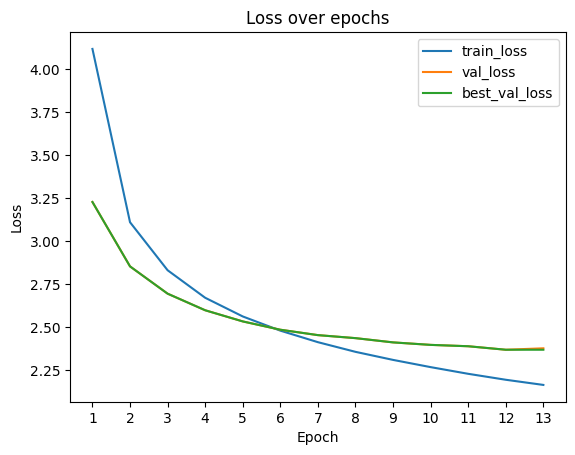

In [6]:
plt.plot(df["epoch"], df["train_loss"])
plt.plot(df["epoch"], df["val_loss"])
plt.plot(df["epoch"], df["best_val_loss"])
plt.legend(["train_loss", "val_loss", "best_val_loss"])
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plt.yticks(list(range(0, 10, 4)))
# plt.xticks(list(range(0, 15, 1)))
# plt.grid(True)
plt.show()

In [17]:
import json

# Load the JSON file
with open("Project/img_prompts.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert dictionary to list of tuples (key, value)
items = list(data.items())

# Split data into chunks of 10,000
chunk_size = 10_000
num_chunks = len(items) // chunk_size + (1 if len(items) % chunk_size != 0 else 0)

for i in range(num_chunks):
    chunk = dict(items[i * chunk_size : (i + 1) * chunk_size])  # Convert back to dict
    filename = f"img_prompts_part_{i+1}.json"
    
    # Save chunk to a new JSON file
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(chunk, f, indent=4)
    
    print(f"Saved {filename} with {len(chunk)} key-value pairs.")

Saved img_prompts_part_1.json with 10000 key-value pairs.
Saved img_prompts_part_2.json with 10000 key-value pairs.
Saved img_prompts_part_3.json with 10000 key-value pairs.
Saved img_prompts_part_4.json with 10000 key-value pairs.
Saved img_prompts_part_5.json with 10000 key-value pairs.
Saved img_prompts_part_6.json with 10000 key-value pairs.
Saved img_prompts_part_7.json with 10000 key-value pairs.
Saved img_prompts_part_8.json with 10000 key-value pairs.
Saved img_prompts_part_9.json with 10000 key-value pairs.
Saved img_prompts_part_10.json with 8287 key-value pairs.


In [137]:
import json

fname = "Project/merged_captions.json"
# fname = "merged_captions_trimmed.json"
with open(fname, "r", encoding="utf-8") as f:
    data = json.load(f)
    print(len(data))

def word_count(s):
    return len(s.split())

lengths = []
for k, v in data.items():
    lengths.append(word_count(v))

mx = max(lengths)
mn = min(lengths)
avg = sum(lengths) / len(lengths)
print(f"Max: {mx}, Min: {mn}, Avg: {avg}")

i = 0
for l in lengths:
    if l > 50:
        i += 1
print(i)

# new_data = {}
# for k, v in data.items():
#     if word_count(v) < 55:
#         new_data[k] = v

# new_l = []
# for k, v in new_data.items():
#     new_l.append(word_count(v))
    

50000
Max: 93, Min: 8, Avg: 27.06534
2051


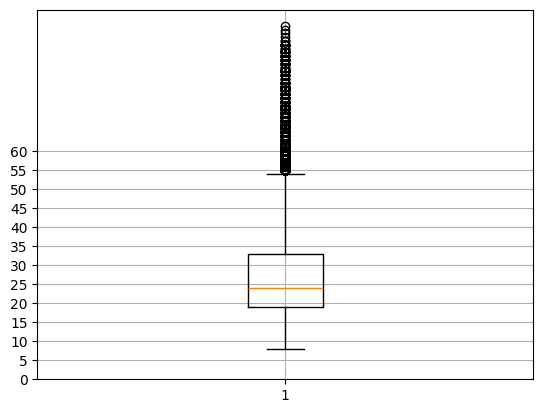

In [126]:
import matplotlib.pyplot as plt

plt.boxplot(lengths)
plt.yticks(list(range(0, 65, 5)))
plt.grid(True)
plt.show()

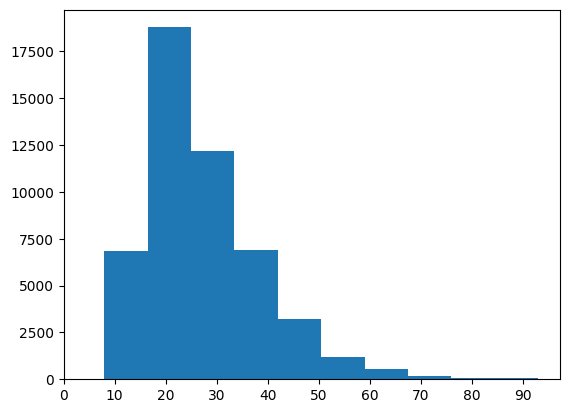

In [131]:
plt.hist(lengths)
plt.xticks(list(range(0, 100, 10)));

In [116]:
import json
import re

max_words = 55
def smart_truncate(caption, max_words):
    words = caption.split()
    if len(words) <= max_words:
        return caption  # Keep as is if within limit
    
    truncated = " ".join(words[:max_words])
    # Find the last period (.) to keep a full sentence
    if "." in truncated:
        truncated = truncated[:truncated.rfind(".") + 1]  
    
    return truncated

# Load dataset
with open("Project/merged_captions.json", "r") as f:
    captions_dict = json.load(f)

# Apply smart truncation only to captions >=max_words words
for key, caption in captions_dict.items():
    if len(caption.split()) >= max_words:
        captions_dict[key] = smart_truncate(caption, max_words)

# Save updated captions
with open("merged_captions_trimmed.json", "w") as f:
    json.dump(captions_dict, f, indent=4)
print("Smart truncation completed.")

Smart truncation completed.


In [ ]:
# import os
# import shutil
# from tqdm import tqdm

# train_dir = "Project/train2017"
# out_dir = "Project/train2017_50k"
# os.makedirs(out_dir, exist_ok=True)

# with open("Project/merged_captions.json", "r", encoding="utf-8") as f:
#     data = json.load(f)

# for k, v in tqdm(data.items(), desc="Copying files"):
#     src = os.path.join(train_dir, k)
#     dst = os.path.join(out_dir, k)
#     shutil.copyfile(src, dst)

Copying files: 100%|██████████| 50000/50000 [04:08<00:00, 201.56it/s]


In [7]:
from training import *

c:\Users\Girish\.conda\envs\venv\Lib\site-packages\torchvision\io\image.py:14: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\Girish\.conda\envs\venv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [9]:
# Initialize COCO API
from pycocotools.coco import COCO
coco = COCO("Project/annotations/captions_train2017.json")

# Load all image IDs and captions
image_ids = list(coco.imgs.keys())
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_ids))

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


In [ ]:
import re
import json
from collections import Counter

# Sample list of captions; replace with your actual captions list.
with open("merged_captions.json", "r") as f:
    captions_dict = json.load(f)

captions = list(captions_dict.values())

def tokenize(text):
    """
    Tokenizes the input text by lowercasing, removing punctuation,
    and splitting on whitespace.
    """
    text = text.lower()
    # Remove punctuation (you can customize the regex as needed)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    return tokens

# Count unique word frequencies
word_counter = Counter()
for caption in captions:
    tokens = tokenize(caption)
    word_counter.update(tokens)

print("Total unique words:", len(word_counter))
print("\nTop 10 most frequent words:")
for word, freq in word_counter.most_common(50):
    print(f"{word}: {freq}")

# Identify duplicate captions
caption_counter = Counter(captions)
duplicates = {caption: count for caption, count in caption_counter.items() if count > 1}

print("\nDuplicate Captions:")
if duplicates:
    for caption, count in duplicates.items():
        print(f"'{caption}' occurs {count} times")
else:
    print("No duplicate captions found.")


Total unique words: 15243

Top 10 most frequent words:
a: 161775
the: 71291
is: 52900
and: 38768
in: 38502
of: 37463
on: 34416
with: 32567
are: 19250
to: 18484
white: 9205
standing: 7755
at: 7536
man: 7411
large: 7356
it: 7223
two: 7199
sitting: 6913
seen: 6824
an: 6634
next: 6272
table: 5758
by: 5430
holding: 5124
street: 4831
people: 4809
as: 4755
its: 4649
his: 4554
black: 4548
group: 4388
young: 4309
near: 4258
woman: 4239
other: 4079
red: 4060
small: 4051
one: 3974
room: 3803
down: 3784
field: 3696
front: 3491
blue: 3365
plate: 3330
filled: 3310
for: 3267
tennis: 3214
background: 3194
he: 3193
which: 3172

Duplicate Captions:
'A woman is taking a selfie in front of a bathroom mirror.' occurs 2 times
'A surfer is riding a giant wave on a surfboard in the water.' occurs 2 times
'A surfer is riding a wave on a surfboard in the ocean.' occurs 3 times
'A surfer is seen riding a wave on a surfboard in the ocean.' occurs 4 times
'A surfer is riding a wave on a surfboard in the water.' oc

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!
Image ID: 391895


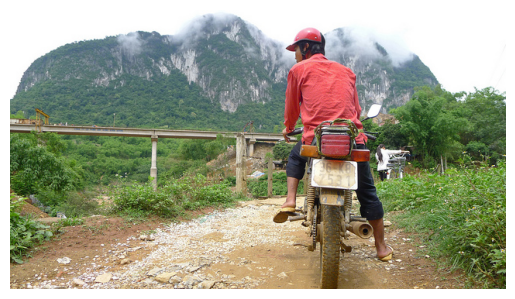

Original Captions:
  1. A man with a red helmet on a small moped on a dirt road. 
  2. Man riding a motor bike on a dirt road on the countryside.
  3. A man riding on the back of a motorcycle.
  4. A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. 
  5. A man in a red shirt and a red hat is on a motorcycle on a hill side.
  6. A man wearing a red helmet and a red shirt is riding a small moped on a dirt road in the countryside. The background features a verdant area with a bridge and cloud-wreathed mountains.
Merged Caption:
 A man wearing a red helmet and a red shirt is riding a small moped on a dirt road in the countryside. The background features a verdant area with a bridge and cloud-wreathed mountains.

Image ID: 522418


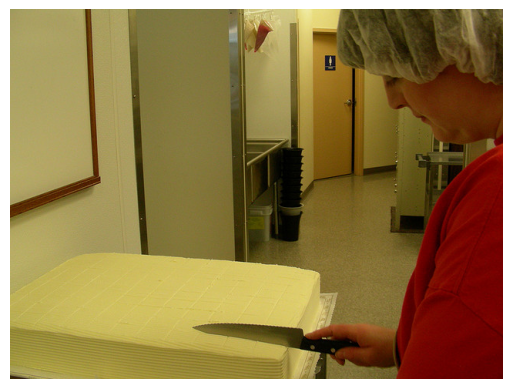

Original Captions:
  1. A woman wearing a net on her head cutting a cake. 
  2. A woman cutting a large white sheet cake.
  3. A woman wearing a hair net cutting a large sheet cake.
  4. there is a woman that is cutting a white cake
  5. A woman marking a cake with the back of a chef's knife. 
  6. A woman is cutting a large white sheet cake with the back of a chef's knife, wearing a hair net on her head.
Merged Caption:
 A woman is cutting a large white sheet cake with the back of a chef's knife, wearing a hair net on her head.

Image ID: 184613


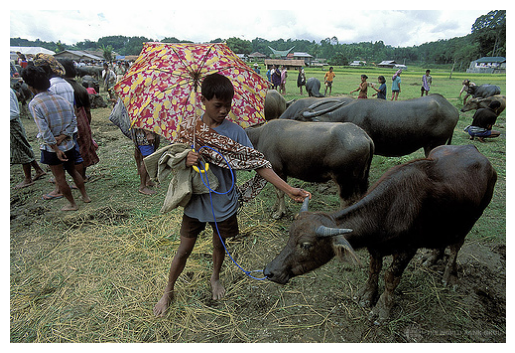

Original Captions:
  1. A child holding a flowered umbrella and petting a yak.
  2. A young man holding an umbrella next to a herd of cattle.
  3. a young boy barefoot holding an umbrella touching the horn of a cow
  4. A young boy with an umbrella who is touching the horn of a cow.
  5. A boy holding an umbrella while standing next to livestock.
  6. A young boy, barefoot and holding an umbrella, gently touches the horn of a cow in a field, surrounded by a herd of cattle.
Merged Caption:
 A young boy, barefoot and holding an umbrella, gently touches the horn of a cow in a field, surrounded by a herd of cattle.

Image ID: 318219


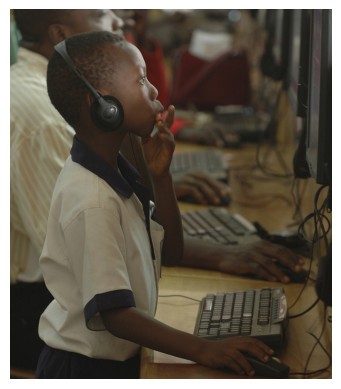

Original Captions:
  1. A young boy standing in front of a computer keyboard.
  2. a little boy wearing headphones and looking at a computer monitor
  3. He is listening intently to the computer at school.
  4. A young boy stares up at the computer monitor.
  5. a young kid with head phones on using a computer 
  6. A young boy, headphones on, intently listens to a computer monitor at school.
Merged Caption:
 A young boy, headphones on, intently listens to a computer monitor at school.

Image ID: 554625


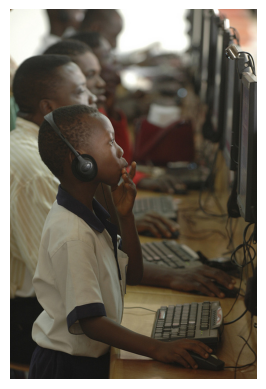

Original Captions:
  1. a boy wearing headphones using one computer in a long row of computers
  2. A little boy with earphones on listening to something.
  3. A group of people sitting at desk using computers.
  4. Children sitting at computer stations on a long table.
  5. A small child wearing headphones plays on the computer.
  6. A young boy, headphones on, is intently focused on a computer in a long row of computers.
Merged Caption:
 A young boy, headphones on, is intently focused on a computer in a long row of computers.



In [7]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from training import ImageCaptionDataset
from PIL import Image
import os

# Load COCO dataset annotations (Change path to your dataset)
ann_file = "annotations/captions_train2017.json"  # Update with your annotation file path
merged_ann_file = "merged_captions.json"
image_dir = "train2017"
coco = COCO(ann_file)
dataset = ImageCaptionDataset(image_dir=image_dir, captions_file=merged_ann_file, tokenizer=None, max_length=55)

# Get all image IDs
img_ids = coco.getImgIds()

# Create a dictionary of image IDs and their corresponding captions
image_captions = {}

for img_id in img_ids[:10]:  # Limiting to 10 for demonstration, remove [:10] for full dataset
    image_filename = coco.loadImgs(img_id)[0]["file_name"]
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    captions = [ann['caption'] for ann in anns[:5]]  # Take first 5 captions if available
    idx = dataset.image_filenames.index(image_filename)
    merged_caption = dataset.captions[idx]
    captions.append(merged_caption)
    image_captions[img_id] = captions

# Print example
for img_id, captions in list(image_captions.items())[:5]:  # Show 5 samples
    print(f"Image ID: {img_id}")
    image_filename = coco.loadImgs(img_id)[0]["file_name"]
    plt.imshow(Image.open(os.path.join(image_dir, image_filename)))
    plt.axis("off")
    plt.show()
    print("Original Captions:")
    for i, caption in enumerate(captions):
        print(f"  {i+1}. {caption}")
        if i == 5:
            print("Merged Caption:\n", caption)
    print()
